In [48]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [49]:
play = pd.read_csv('../working/playlevel/during_play/2016-10-1275.csv')

In [50]:
play.dtypes

Unnamed: 0                            int64
season_year                           int64
gamekey                               int64
playid                                int64
gsisid                              float64
time                                 object
x                                   float64
y                                   float64
dis                                 float64
o                                   float64
dir                                 float64
event                                object
number                               object
position                             object
role                                 object
generalized_role                     object
punting_returning_team               object
gsisid_injured                      float64
player_activity_derived             float64
turnover_related                    float64
primary_impact_type                 float64
primary_partner_gsisid              float64
primary_partner_activity_derived

In [54]:
if not play.left_to_right.any():
    print('not left to right')
playavgs = play.groupby('role')['o','dir','mph','dis'].agg({'mean','std'})
playavgs.columns = ['_'.join(col).strip() for col in playavgs.columns.values]
playavgs['season_year'] = play[['season_year','gamekey','playid']].values[0][0]
playavgs['gamekey'] = play[['season_year','gamekey','playid']].values[0][1]
playavgs['playid'] = play[['season_year','gamekey','playid']].values[0][2]

not left to right


role
GL      AxesSubplot(0.125,0.125;0.775x0.755)
GR      AxesSubplot(0.125,0.125;0.775x0.755)
P       AxesSubplot(0.125,0.125;0.775x0.755)
PDL1    AxesSubplot(0.125,0.125;0.775x0.755)
PDL2    AxesSubplot(0.125,0.125;0.775x0.755)
PDL3    AxesSubplot(0.125,0.125;0.775x0.755)
PDR1    AxesSubplot(0.125,0.125;0.775x0.755)
PDR2    AxesSubplot(0.125,0.125;0.775x0.755)
PDR3    AxesSubplot(0.125,0.125;0.775x0.755)
PLG     AxesSubplot(0.125,0.125;0.775x0.755)
PLS     AxesSubplot(0.125,0.125;0.775x0.755)
PLT     AxesSubplot(0.125,0.125;0.775x0.755)
PLW     AxesSubplot(0.125,0.125;0.775x0.755)
PPR     AxesSubplot(0.125,0.125;0.775x0.755)
PR      AxesSubplot(0.125,0.125;0.775x0.755)
PRG     AxesSubplot(0.125,0.125;0.775x0.755)
PRT     AxesSubplot(0.125,0.125;0.775x0.755)
PRW     AxesSubplot(0.125,0.125;0.775x0.755)
VLi     AxesSubplot(0.125,0.125;0.775x0.755)
VLo     AxesSubplot(0.125,0.125;0.775x0.755)
VRi     AxesSubplot(0.125,0.125;0.775x0.755)
VRo     AxesSubplot(0.125,0.125;0.775x0.755)
Name:

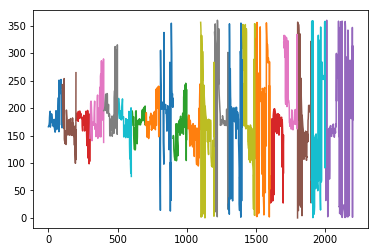

In [59]:
play.groupby('role')['o'].plot()

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import cmath


def cart2pol(x, y):
    """Convert from Cartesian to polar coordinates.

    Example
    -------
    >>> theta, radius = pol2cart(x, y)
    """
    radius = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return theta, radius

def compass(angles, radii, arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    #angles, radii = cart2pol(u, v)
    
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))

    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, np.max(radii))

    return fig, ax

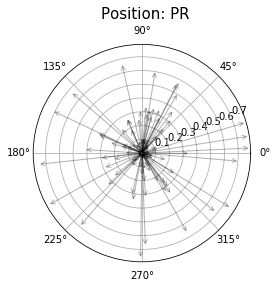

In [119]:
d = play.loc[play['role'] == 'PR']
compass(d['dir'], d['dis'], arrowprops={'alpha':0.3})
plt.suptitle('Position: PR', x=0.52, y=1.01, fontsize=15)
plt.show()

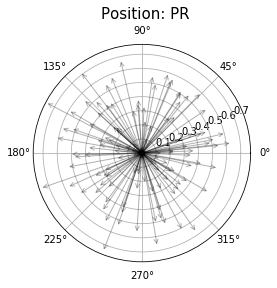

In [120]:
play2 = pd.read_csv('../working/playlevel/during_play/2016-10-1409.csv')
d = play2.loc[play2['role'] == 'PR']
compass(d['dir'], d['dis'], arrowprops={'alpha':0.3})
plt.suptitle('Position: PR', x=0.52, y=1.01, fontsize=15)
plt.show()

In [138]:
r = d['dir'].values[0]

In [139]:
phi = d['dis'].values[0]

Pandas(Index=3190, _1=6238, season_year=2016, gamekey=10, playid=3228, gsisid=32653.0, time='2016-08-13 02:08:29.200', x=48.6599998474121, y=34.86999893188477, dis=0.4000000059604645, o=147.27999877929688, dir=216.33999633789062, event=nan, number='2', position='WR', role='GR', generalized_role='Gunner', punting_returning_team='Punting_Team', gsisid_injured=nan, player_activity_derived=nan, turnover_related=nan, primary_impact_type=nan, primary_partner_gsisid=nan, primary_partner_activity_derived=nan, friendly_fire=nan, ball_snap='2016-08-13 02:08:19.600', line_set='2016-08-13 02:08:16.800', play_submit='2016-08-13 02:08:41.300', punt='2016-08-13 02:08:21.800', punt_play='2016-08-13 02:08:12.300', punt_received='2016-08-13 02:08:27.100', tackle='2016-08-13 02:08:34.400', mph=8.181818321918591, injured_player=False, primary_partner_player=False, left_to_right=False)

In [156]:
cmath.rect(r, phi)

(264.03258895353054+213.5129595890802j)

(0.026433550628299624, -1.3551167946337377)

In [141]:
cmath.rect(d['dir'], d['dis'])

TypeError: cannot convert the series to <class 'float'>

In [165]:
rmean

0.026433550628299624

In [166]:
phimean

-1.3551167946337377

In [170]:
stats.circmean(d['o'], high=360)

111.6824899163084

ValueError: The Subplot must have been created in the present figure

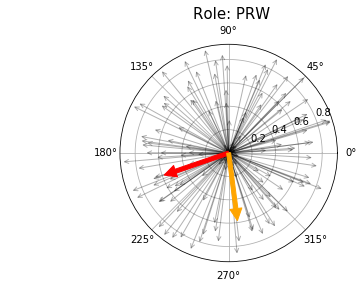

In [182]:
play3 = pd.read_csv('../working/playlevel/during_play/2016-10-3228.csv')
fig = plt.figure(figsize=(10, 8))

from scipy import stats
for role in play3['role'].unique():
    d = play3.loc[play3['role'] == role]
    fig2, ax = compass(d['dir'], d['dis'], arrowprops={'alpha':0.3})
    ax.annotate("", xy=(d['dir'].mean(), d['dis'].mean()), xytext=(0, 0), arrowprops={'color': 'red'})
    rmean, phimean = cmath.polar(d.apply(lambda col: cmath.rect(col['dis'], col['o']), axis=1).mean())
    ax.annotate("", xy=(rmean, phimean), xytext=(0, 0), arrowprops={'color': 'blue'})
    ax.annotate("", xy=(stats.circmean(d['o'], high=360), d['dis'].mean()), xytext=(0, 0), arrowprops={'color': 'orange'})
    plt.suptitle('Role: {}'.format(role), x=0.52, y=1.01, fontsize=15)
    # plt.show()
    fig.add_subplot(ax)

In [122]:
pi = pd.read_csv('../input/play_information.csv')

In [123]:
pi.loc[(pi['Season_Year'] == play3['season_year'].loc[0]) &
       (pi['GameKey'] == play3['gamekey'].loc[0]) &
       (pi['PlayID'] == play3['playid'].loc[0])]['PlayDescription'].values[0]

'(:38) B.Wing punts 48 yards to MIA 25, Center-Z.DeOssie. J.Grant to NYG 47 for 28 yards (I.Williams, C.Taylor).'

In [172]:
def compass(angles, radii, ax arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    #angles, radii = cart2pol(u, v)
    

    kw = dict(arrowstyle="->", color='k')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, np.max(radii))

    return fig, ax

(<matplotlib.figure.Figure at 0x7fd903fc4748>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7fd903af2e10>)

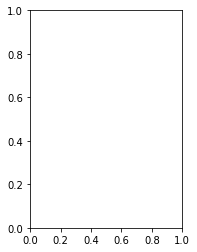

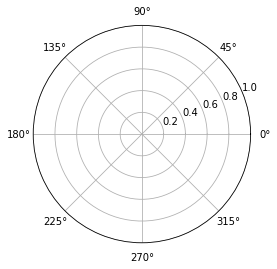

In [178]:
fig = plt.figure(figsize=(10, 8))
'
plt.subplot(1, 2, 1)
plt.subplots(subplot_kw=dict(polar=True))
